In [7]:
from reactivex import Observer
import reactivex as rx
import reactivex.operators as ops
from pyannote.core import Annotation, SlidingWindow, SlidingWindowFeature, Segment

from dataclasses import dataclass
from typing import Callable, Optional, List, Any, Tuple

import numpy as np
from pyannote.core import Annotation, SlidingWindow, SlidingWindowFeature, Segment
from reactivex import operators as ops
from reactivex import Observable

Operator = Callable[[Observable], Observable]

In [6]:
import asyncio
import threading
import time

def fun(name:str):
    current_thread = threading.current_thread()
    print(f"{name}:: Current Thread: {current_thread.name} (ID: {current_thread.ident})")
    print(f"{name}:: In Main Thread: {threading.current_thread() is threading.main_thread()}")
    print("---")
    
async def fun_async(name:str):
    fun(name)
    await asyncio.sleep(10)
    print("done fun async")


async def mut_call_async(d):
    d["something"] = 2

def mut_call(d):
    d["something"] = 1

async def main_asyncio_runner():
    fun("mainloop")
    a = {"something": 3}
    asyncio.get_event_loop().run_in_executor(None, mut_call, a)
    print(a)
    task = asyncio.create_task(mut_call_async(a))
    i = 0
    while i < 100:
        await asyncio.sleep(2)
        i = i + 1
        print(a)
        print("running loop")

mainloop:: Current Thread: MainThread (ID: 8361659392)
mainloop:: In Main Thread: True
---
{'something': 1}
{'something': 2}
running loop
{'something': 2}
running loop
{'something': 2}
running loop
{'something': 2}
running loop
{'something': 2}
running loop
{'something': 2}
running loop
{'something': 2}
running loop
{'something': 2}
running loop
{'something': 2}
running loop
{'something': 2}
running loop
{'something': 2}
running loop
{'something': 2}
running loop
{'something': 2}
running loop
{'something': 2}
running loop
{'something': 2}
running loop
{'something': 2}
running loop
{'something': 2}
running loop
{'something': 2}
running loop
{'something': 2}
running loop
{'something': 2}
running loop
{'something': 2}
running loop


CancelledError: 

In [8]:
from reactivex.scheduler.eventloop import AsyncIOScheduler
from reactivex.subject import Subject

In [9]:
observable = rx.of(*list(range(0, 1000)))
subject = Subject()
async def new_value():
    subject.on_next("Hello new")
    await asyncio.sleep(2)

await new_value()

subject.subscribe(on_next=fun_async, scheduler=AsyncIOScheduler(asyncio.get_event_loop()))

In [15]:
for segment, mid, speaker in r.itertracks(yield_label=True):
    print(segment, mid, speaker)

AttributeError: 'SlidingWindowFeature' object has no attribute 'itertracks'

In [12]:
import torch
from pyannote.audio import Pipeline, Model, Inference
m = Model.from_pretrained("pyannote/segmentation-3.0")
inference = Inference(m, step=2.5)

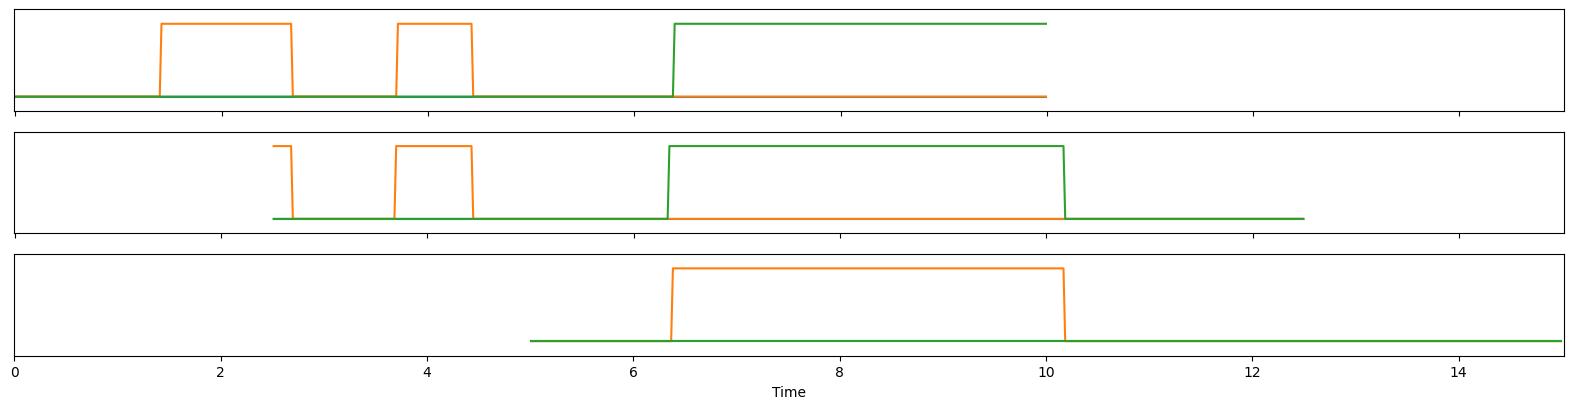

In [14]:
r = inference('/Users/mj/Documents/Code/data/audio.wav')
r

In [16]:
e = Model.from_pretrained("pyannote/wespeaker-voxceleb-resnet34-LM")

In [17]:
from pyannote.audio import Inference
inference = Inference(e, window="whole")
embedding1 = inference("/Users/mj/Documents/Code/data/audio.wav")

In [27]:
from pyannote.core import SlidingWindow

# Define sliding window parameters
window_duration = 1.0  # in seconds
window_step = 0.5      # in seconds

# Create the SlidingWindow
sliding_window = SlidingWindow(start=0.0, end=10.5, duration=window_duration, step=window_step)

In [28]:
for segment in sliding_window:
    print(segment)

[ 00:00:00.000 -->  00:00:01.000]
[ 00:00:00.500 -->  00:00:01.500]
[ 00:00:01.000 -->  00:00:02.000]
[ 00:00:01.500 -->  00:00:02.500]
[ 00:00:02.000 -->  00:00:03.000]
[ 00:00:02.500 -->  00:00:03.500]
[ 00:00:03.000 -->  00:00:04.000]
[ 00:00:03.500 -->  00:00:04.500]
[ 00:00:04.000 -->  00:00:05.000]
[ 00:00:04.500 -->  00:00:05.500]
[ 00:00:05.000 -->  00:00:06.000]
[ 00:00:05.500 -->  00:00:06.500]
[ 00:00:06.000 -->  00:00:07.000]
[ 00:00:06.500 -->  00:00:07.500]
[ 00:00:07.000 -->  00:00:08.000]
[ 00:00:07.500 -->  00:00:08.500]
[ 00:00:08.000 -->  00:00:09.000]
[ 00:00:08.500 -->  00:00:09.500]
[ 00:00:09.000 -->  00:00:10.000]
[ 00:00:09.500 -->  00:00:10.500]
[ 00:00:10.000 -->  00:00:11.000]


In [29]:
import torchaudio

# Load the audio file
audio_file = "/Users/mj/Documents/Code/data/audio.wav"
waveform, sample_rate = torchaudio.load(audio_file)

# Ensure the audio is mono
if waveform.shape[0] > 1:
    waveform = waveform.mean(dim=0, keepdim=True)

In [30]:
from pyannote.core import SlidingWindowFeature

# Calculate the number of frames per window
frames_per_window = int(window_duration * sample_rate)

# Initialize an empty list to store the features
features = []

# Slide over the waveform
for window in sliding_window:
    start_sample = int(window.start * sample_rate)
    end_sample = start_sample + frames_per_window
    if end_sample <= waveform.shape[1]:
        window_data = waveform[:, start_sample:end_sample].numpy().T
        features.append(window_data)
    else:
        break

# Convert the list of features to a numpy array
features = np.array(features)

# Create the SlidingWindowFeature
sliding_window_feature = SlidingWindowFeature(features, sliding_window)

In [31]:
for w in sliding_window_feature:
    print(w)

(<Segment(0, 1)>, array([[0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       ...,
       [6.1035156e-05],
       [9.4604492e-04],
       [9.1552734e-04]], dtype=float32))
(<Segment(0.5, 1.5)>, array([[-0.00061035],
       [-0.00079346],
       [-0.00100708],
       ...,
       [ 0.02120972],
       [ 0.0218811 ],
       [ 0.02252197]], dtype=float32))
(<Segment(1, 2)>, array([[ 0.00039673],
       [-0.00045776],
       [-0.00137329],
       ...,
       [ 0.01251221],
       [ 0.00869751],
       [ 0.00543213]], dtype=float32))
(<Segment(1.5, 2.5)>, array([[ 0.02307129],
       [ 0.02346802],
       [ 0.02380371],
       ...,
       [-0.12628174],
       [-0.12728882],
       [-0.12756348]], dtype=float32))
(<Segment(2, 3)>, array([[ 0.00469971],
       [ 0.00814819],
       [ 0.01101685],
       ...,
       [-0.00222778],
       [-0.00204468],
       [-0.00183105]], dtype=float32))
(<Segment(2.5, 3.5)>, array([[-0.12774658],
       [-0.12719727],
       [-0.12612915